# Deep Learning for Crude Oil Price forecasting
This file contains the following deep learning approaches for forecasting crude oil prices:
- Feed-forward neural network
- LSTM
- GRU
where the latter two belong to the class of recurrent neural networks (RNN) and are especially suitable for time series data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
# Import data
X_train1 = pd.read_csv('data/Pre-processed data/X_train.csv').to_numpy()
y_train1 = pd.read_csv('data/Pre-processed data/y_train.csv').to_numpy()
X_test = pd.read_csv('data/Pre-processed data/X_test.csv').to_numpy()
y_test = pd.read_csv('data/Pre-processed data/y_test.csv').to_numpy()
X_val = X_train1[120:144,]
y_val = y_train1[120:144]
X_train = X_train1[:120,]
y_train = y_train1[:120]
X_train_RNN=X_train.reshape(np.shape(X_train)[0],1,np.shape(X_train)[1])
X_val_RNN =X_val.reshape(np.shape(X_val)[0],1,np.shape(X_val)[1])
X_test_RNN=X_test.reshape(np.shape(X_test)[0],1,np.shape(X_test)[1])
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(120, 5)
(24, 5)
(96, 5)


In [379]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# scalerX = StandardScaler()          #Instantiate the scaler
# scalery = StandardScaler() 
# scaled_X_train = scalerX.fit_transform(X_train)
# scaled_y_train = scalery.fit_transform(y_train)
# scaled_X_val = scalerX.transform(X_val)
# scaled_y_val = scalery.transform(y_val)
# scaled_X_test = scalerX.transform(X_test)
# scaled_y_test = scalery.transform(y_test)

# def select_dataset(selection):
#     scaler = StandardScaler()          #Instantiate the scaler
#     if (selection=="Full"):
#         X1 = scaler.fit_transform(X_train)   #Fit and transform the data
#         X2 = scaler.transform(X_test[:,0:10])          #Fit and transform the validation set
#     elif (selection=="Sparse"):
#         sel=np.array([1,3,9]) #texture, area, symmetry
#         X1 = scaler.fit_transform(X_train[:,sel])    #Fit and transform the data
#         X2 = scaler.transform(X_test[:,sel] )         #Fit and transform the validation set
#     elif (selection=="PCA-based"):
#         sel=np.array([0,1,4,5,7,8,9]) #radius, texture, compactness, smoothness, c. points, symmetry and fractal-dim 
#         X1 = scaler.fit_transform(X_train[:,sel])    #Fit and transform the data
#         X2 = scaler.transform(X_test[:,sel] )         #Fit and transform the validation set
#     else:
#         print("Choose Full, Sparse or PCA-based")
#     return X1,X2

# scaled_X_train,scaled_X_test = select_dataset("Full")

## ANN
The benchmark deep learning model is a feed-forward neural network (ANN) with:
- Two dense layers with 10 nodes and `relu' activation.
- Linear activation for the output.
- Adam optimiser and mse loss.

In [587]:
def basic():
    input_data=tf.keras.Input(shape=(np.shape(X_train)[1]))
    
    x= layers.BatchNormalization()(input_data)
    #x= layers.Dense(8, activation="sigmoid")(input_data)
    x= layers.Dense(64, activation="relu")(x)
    x= layers.Dropout(0.2)(x)
    x= layers.Dense(32, activation="relu")(x)
    x= layers.Dropout(0.2)(x)
    x= layers.Dense(16, activation="relu")(x)
    x= layers.Dropout(0.2)(x)
    x= layers.Dense(8, activation="relu")(x)
    #x= layers.Dense(5, activation="relu")(x)
    output = layers.Dense(1,activation="linear")(x)

    model = keras.models.Model(input_data, output)
    adam = tf.keras.optimizers.Adam()
    model.compile(optimizer=adam, loss="mse",metrics=['mse'])
    return model

In [588]:
basic().summary()

Model: "model_3623"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3625 (InputLayer)     [(None, 3)]               0         
                                                                 
 batch_normalization_3622 (B  (None, 3)                12        
 atchNormalization)                                              
                                                                 
 dense_7547 (Dense)          (None, 64)                256       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7548 (Dense)          (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                        

In [589]:
model=basic()
history=model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_val,y_val))

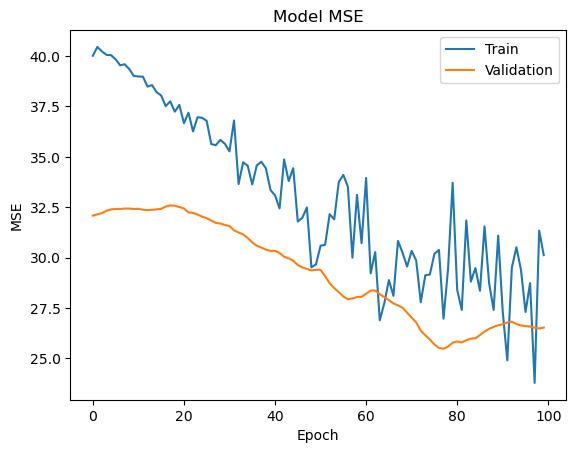

Final MSE 26.532011032104492
Minimal MSE achieved = 25.483491897583008 at epoch 78


In [590]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title(f'Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(f"Final MSE", history.history['val_mse'][-1])
print(f"Minimal MSE achieved =", np.min(history.history['val_mse']), 
      "at epoch",(np.argmin(history.history['val_mse'])+1))

In [591]:
model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


array([[ -9.997888  ],
       [ -6.2660213 ],
       [  1.5438304 ],
       [ -4.0960617 ],
       [  1.8478918 ],
       [  1.6899004 ],
       [  2.2476876 ],
       [  0.6209365 ],
       [ -0.49416408],
       [  1.0917408 ],
       [  0.18994223],
       [  1.9328741 ],
       [ -0.8490694 ],
       [ -0.55319536],
       [  1.6298299 ],
       [  3.6142678 ],
       [  4.4816413 ],
       [  1.7583423 ],
       [  0.9024556 ],
       [  1.8308288 ],
       [  0.9017106 ],
       [  2.389861  ],
       [  1.9716563 ],
       [  2.1523888 ],
       [  1.3001521 ],
       [ -0.4224849 ],
       [  1.3424726 ],
       [ -1.6007696 ],
       [  1.6075299 ],
       [  1.6195076 ],
       [  1.5455093 ],
       [  1.141044  ],
       [  2.4146264 ],
       [  2.34521   ],
       [  1.8593342 ],
       [  1.1868528 ],
       [  1.3605264 ],
       [  1.0420775 ],
       [  1.2914115 ],
       [  1.1826574 ],
       [  1.2416027 ],
       [  1.3917717 ],
       [  1.1126757 ],
       [  2

3/3 [==============================] - 0s 1ms/step
3426.8605496096197


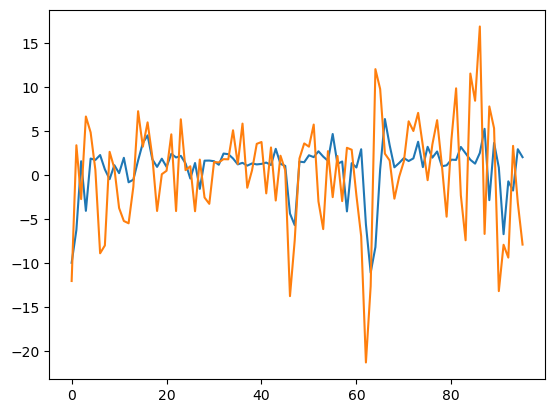

In [592]:
plt.plot(model.predict(X_test))
plt.plot(y_test)
print(np.sum((model.predict(X_test)-y_test)**2))

In [593]:
step=1
R=int(np.shape(y_test)[0]/step)
y_hat = np.array([])
X_rolling=np.concatenate((X_train,X_val, X_test), axis=0) 
y_rolling=np.concatenate((y_train,y_val, y_test), axis=0)
T1=np.shape(X_rolling)[0]
T=(T1-step)-R*step+1
for i in range(R):
    X1 = X_rolling[i*step:T+step*i,:]
    X1_train= X1[:120,]
    X1_val= X1[120:,]
    y1 = y_rolling[i*step:T+step*i,]
    y1_train= y1[:120]
    y1_val= y1[120:]
    X2 = X_rolling[T+step*i:T+step*(i+1),:]
    #y2 = y_rolling[T+step*i:T+step*(i+1)]
    model = basic()
    checkpoint_filepath = 'model_checkpoint.h5'
    model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',    # Monitor validation loss
    mode='min',            # 'min' if the metric should be minimized, 'max' if it should be maximized
    save_best_only=True    # Save only the best model (i.e., with the lowest validation loss)
    )
    history = model.fit(X1_train,y1_train,epochs=100,verbose=0,validation_data=(X1_val,y1_val),callbacks=[model_checkpoint_callback])
    y_pred = model.predict(X2).ravel()
    y_hat=np.append(y_hat,y_pred)
    #print(y_hat)
    print(i)
MSPE_NN=(1/(np.shape(y_test)[0])*np.sum((y_hat-y_test[:,0])**2))**(1/2)
MAE_NN=1/(np.shape(y_test)[0])*np.sum(np.absolute(y_hat-y_test[:,0]))
print(f"MSFE for a feed-forward Neural Network = {MSPE_NN}")
print(f"MAE for a feed-forward Neural Network = {MAE_NN}")

1/1 [==============================] - 0s 53ms/step
0
1/1 [==============================] - 0s 54ms/step
1
1/1 [==============================] - 0s 51ms/step
2
1/1 [==============================] - 0s 45ms/step
3
1/1 [==============================] - 0s 45ms/step
4
1/1 [==============================] - 0s 47ms/step
5
1/1 [==============================] - 0s 44ms/step
6
1/1 [==============================] - 0s 43ms/step
7
1/1 [==============================] - 0s 45ms/step
8
1/1 [==============================] - 0s 44ms/step
9
1/1 [==============================] - 0s 43ms/step
10
1/1 [==============================] - 0s 43ms/step
11
1/1 [==============================] - 0s 48ms/step
12
1/1 [==============================] - 0s 49ms/step
13
1/1 [==============================] - 0s 43ms/step
14
1/1 [==============================] - 0s 47ms/step
15
1/1 [==============================] - 0s 43ms/step
16
1/1 [==============================] - 0s 45ms/step
17
1/1 [===============

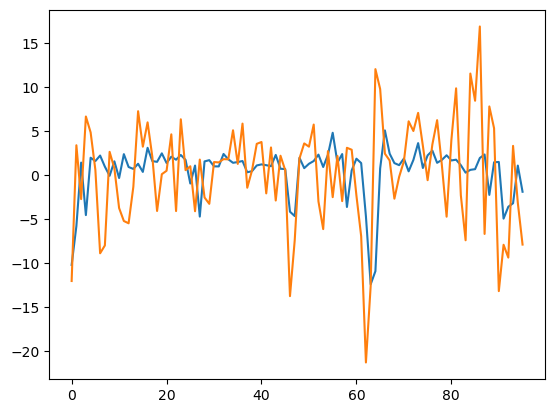

In [594]:
plt.plot(y_hat)
plt.plot(y_test)

In [376]:
import csv
def save_vector_to_csv(vector, filename):
    # Convert the vector to a 2D array (matrix)
    matrix = np.array(vector).reshape(1, -1)

    # Write the matrix to the CSV file
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(matrix)

file_name = "y_hat_ANN_12_step.csv"
save_vector_to_csv(y_hat, file_name)

## LSTM
LSTM is one of the modern RNN's often used in practice. In this case, it is specified such that it has:

In [23]:
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
def RNN_LSTM():
    input_data=tf.keras.Input(shape=(1,np.shape(X_train)[1]))
    #input_data=layers.Reshape((np.shape(X_train)[0], np.shape(X_train)[1]))(input_data)
    x= layers.BatchNormalization()(input_data)
    ## Shape [batch, time, features] => [batch, time, lstm_units]
    x = layers.LSTM(32,return_sequences=True)(x)
    x = layers.LSTM(32,return_sequences=True)(x)
    x = layers.LSTM(32,return_sequences=True)(x)
    x = layers.LSTM(32,return_sequences=False)(x)#8,4#or input_data and skip return_sequences=True
    # Shape => [batch, time, features]
    x = layers.Dense(10, activation="relu")(x)
    output = layers.Dense(1,activation="linear")(x)

    model = keras.models.Model(input_data, output)
    adam = tf.keras.optimizers.Adam()
    model.compile(optimizer=adam, loss="mean_squared_error",metrics=['mse'])
    return model

In [25]:
RNN_LSTM().summary()

Model: "model_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_105 (InputLayer)      [(None, 1, 5)]            0         
                                                                 
 batch_normalization_104 (Ba  (None, 1, 5)             20        
 tchNormalization)                                               
                                                                 
 lstm_407 (LSTM)             (None, 1, 32)             4864      
                                                                 
 lstm_408 (LSTM)             (None, 1, 32)             8320      
                                                                 
 lstm_409 (LSTM)             (None, 1, 32)             8320      
                                                                 
 lstm_410 (LSTM)             (None, 32)                8320      
                                                         

In [26]:
model=RNN_LSTM()
history=model.fit(X_train_RNN,y_train,epochs=200,verbose=0,validation_data=(X_val_RNN,y_val))

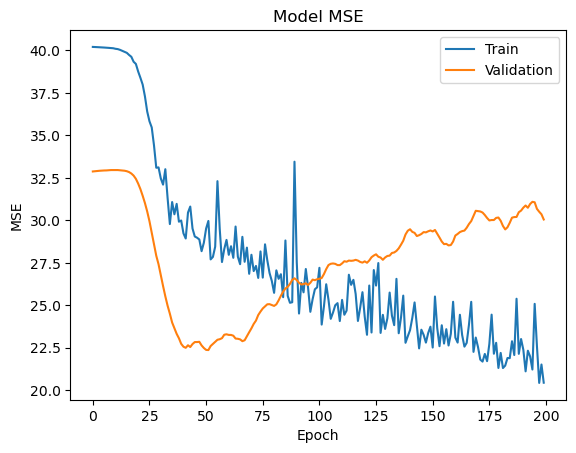

Final MSE 30.05040740966797
Minimal MSE achieved = 22.363510131835938 at epoch 52


In [27]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title(f'Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(f"Final MSE", history.history['val_mse'][-1])
print(f"Minimal MSE achieved =", np.min(history.history['val_mse']), 
      "at epoch",(np.argmin(history.history['val_mse'])+1))

3/3 [==============================] - 0s 1ms/step
3692.865380561032


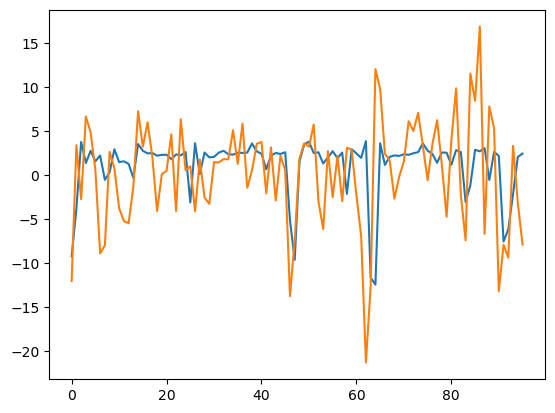

In [28]:
plt.plot(model.predict(X_test_RNN))
plt.plot(y_test)
print(np.sum((model.predict(X_test_RNN)-y_test)**2))

In [29]:
step=1
R=int(np.shape(y_test)[0]/step)
y_hat = np.array([])
X_rolling=np.concatenate((X_train_RNN,X_val_RNN, X_test_RNN), axis=0) 
y_rolling=np.concatenate((y_train,y_val, y_test), axis=0)
T1=np.shape(X_rolling)[0]
T=(T1-step)-R*step+1
for i in range(R):
    X1 = X_rolling[i*step:T+step*i,:]
    X1_train= X1[:120,]
    X1_val= X1[120:,]
    y1 = y_rolling[i*step:T+step*i,]
    y1_train= y1[:120]
    y1_val= y1[120:]
    X2 = X_rolling[T+step*i:T+step*(i+1),:]
    model = autoencoder()
    checkpoint_filepath = 'model_checkpoint_LSTM.h5'
    model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',    # Monitor validation loss
    mode='min',            # 'min' if the metric should be minimized, 'max' if it should be maximized
    save_best_only=True    # Save only the best model (i.e., with the lowest validation loss)
    )
    history = model.fit(X1_train,y1_train,epochs=100,verbose=0,validation_data=(X1_val,y1_val),callbacks=[model_checkpoint_callback])
    y_pred = model.predict(X2).ravel()
    y_hat=np.append(y_hat,y_pred)
    print(i)
MSPE_LSTM=(1/(np.shape(y_test)[0])*np.sum((y_hat-y_test[:,0])**2))**(1/2)
MAE_LSTM=1/(np.shape(y_test)[0])*np.sum(np.absolute(y_hat-y_test[:,0]))
print(f"MSFE for LSTM = {MSPE_LSTM}")
print(f"MAE for LSTM = {MAE_LSTM}")

1/1 [==============================] - 1s 557ms/step
0
1/1 [==============================] - 1s 532ms/step
1
1/1 [==============================] - 1s 534ms/step
2
1/1 [==============================] - 1s 532ms/step
3
1/1 [==============================] - 1s 529ms/step
4
1/1 [==============================] - 1s 541ms/step
5
1/1 [==============================] - 1s 541ms/step
6
1/1 [==============================] - 1s 992ms/step
7
1/1 [==============================] - 1s 539ms/step
8
1/1 [==============================] - 1s 536ms/step
9
1/1 [==============================] - 1s 544ms/step
10
1/1 [==============================] - 1s 529ms/step
11
1/1 [==============================] - 1s 553ms/step
12
1/1 [==============================] - 1s 546ms/step
13
1/1 [==============================] - 1s 532ms/step
14
1/1 [==============================] - 1s 542ms/step
15
1/1 [==============================] - 1s 555ms/step
16
1/1 [==============================] - 1s 995ms/step
17
1/

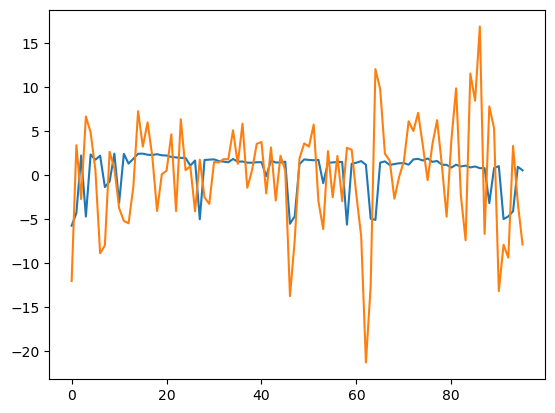

In [30]:
plt.plot(y_hat)
plt.plot(y_test)

In [ ]:
np.shape(y_test)

(96, 1)

In [611]:
import csv
def save_vector_to_csv(vector, filename):
    # Convert the vector to a 2D array (matrix)
    matrix = np.array(vector).reshape(1, -1)

    # Write the matrix to the CSV file
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(matrix)

file_name = "y_hat_deep_LSTM_1_step.csv"
save_vector_to_csv(y_hat, file_name)

## GRU
GRU is another modern RNN often used in practice. In this case, it is specified such that it has:

In [595]:
# https://keras.io/api/layers/recurrent_layers/gru/
def GRU():
    input_data=tf.keras.Input(shape=(1,np.shape(X_train)[1]))
    #input_data=layers.Reshape((np.shape(X_train)[0], np.shape(X_train)[1]))(input_data)
    #x= layers.BatchNormalization()(input_data)
    ## Shape [batch, time, features] => [batch, time, lstm_units]
    x = layers.GRU(10,return_sequences=True)(input_data)
    x = layers.GRU(10)(x)
    #x = layers.LSTM(32,return_sequences=False)(x)#or input_data and skip return_sequences=True
    # Shape => [batch, time, features]
    x = layers.Dense(10, activation="relu")(x)
    output = layers.Dense(1,activation="linear")(x)

    model = keras.models.Model(input_data, output)
    adam = tf.keras.optimizers.Adam()
    model.compile(optimizer=adam, loss="mean_squared_error",metrics=['mse'])
    return model

In [596]:
GRU().summary()

Model: "model_3721"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3723 (InputLayer)     [(None, 1, 3)]            0         
                                                                 
 gru (GRU)                   (None, 1, 10)             450       
                                                                 
 gru_1 (GRU)                 (None, 10)                660       
                                                                 
 dense_8037 (Dense)          (None, 10)                110       
                                                                 
 dense_8038 (Dense)          (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [597]:
model=GRU()
history=model.fit(X_train_RNN,y_train,epochs=100,verbose=0,validation_data=(X_val_RNN,y_val))

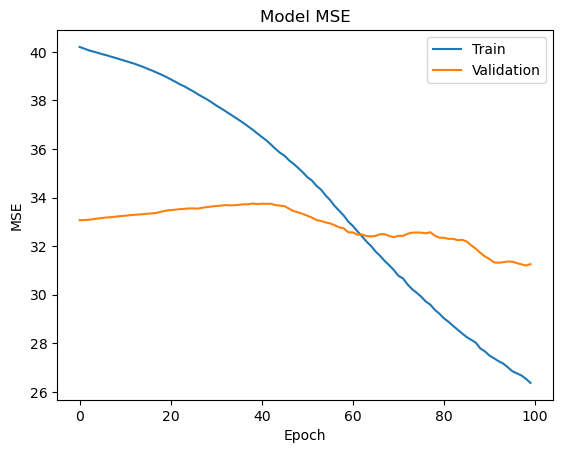

Final MSE 31.25691032409668
Minimal MSE achieved = 31.19923210144043 at epoch 99


In [598]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title(f'Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(f"Final MSE", history.history['val_mse'][-1])
print(f"Minimal MSE achieved =", np.min(history.history['val_mse']), 
      "at epoch",(np.argmin(history.history['val_mse'])+1))

3/3 [==============================] - 0s 1ms/step
0.5227603015327948


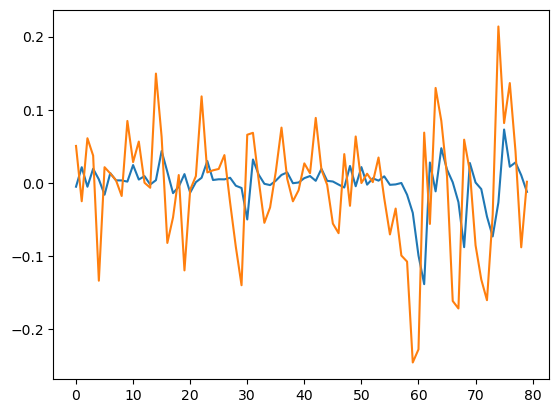

In [85]:
plt.plot(model.predict(X_val_RNN))
plt.plot(y_val)
print(np.sum((model.predict(X_val_RNN)-y_val)**2))

In [600]:
step=1
R=int(np.shape(y_test)[0]/step)
y_hat = np.array([])
X_rolling=np.concatenate((X_train_RNN,X_val_RNN, X_test_RNN), axis=0) 
y_rolling=np.concatenate((y_train,y_val, y_test), axis=0)
T1=np.shape(X_rolling)[0]
T=(T1-step)-R*step+1
for i in range(R):
    X1 = X_rolling[i*step:T+step*i,:]
    X1_train= X1[:120,]
    X1_val= X1[120:,]
    y1 = y_rolling[i*step:T+step*i,]
    y1_train= y1[:120]
    y1_val= y1[120:]
    X2 = X_rolling[T+step*i:T+step*(i+1),:]
    model = GRU()
    checkpoint_filepath = 'model_checkpoint_GRU.h5'
    model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',    # Monitor validation loss
    mode='min',            # 'min' if the metric should be minimized, 'max' if it should be maximized
    save_best_only=True    # Save only the best model (i.e., with the lowest validation loss)
    )
    history = model.fit(X1_train,y1_train,epochs=100,verbose=0,validation_data=(X1_val,y1_val),callbacks=[model_checkpoint_callback])
    y_pred = model.predict(X2).ravel()
    y_hat=np.append(y_hat,y_pred)
    print(i)
MSPE_GRU=(1/(np.shape(y_test)[0])*np.sum((y_hat-y_test[:,0])**2))**(1/2)
MAE_GRU=1/(np.shape(y_test)[0])*np.sum(np.absolute(y_hat-y_test[:,0]))
print(f"MSFE for GRU = {MSPE_LSTM}")
print(f"MAE for GRU = {MAE_LSTM}")

1/1 [==============================] - 0s 370ms/step
0
1/1 [==============================] - 0s 365ms/step
1
1/1 [==============================] - 0s 360ms/step
2
1/1 [==============================] - 0s 364ms/step
3
1/1 [==============================] - 0s 365ms/step
4
1/1 [==============================] - 0s 382ms/step
5
1/1 [==============================] - 0s 370ms/step
6
1/1 [==============================] - 0s 354ms/step
7
1/1 [==============================] - 0s 361ms/step
8
1/1 [==============================] - 0s 358ms/step
9
1/1 [==============================] - 0s 353ms/step
10
1/1 [==============================] - 0s 386ms/step
11
1/1 [==============================] - 0s 362ms/step
12
1/1 [==============================] - 0s 362ms/step
13
1/1 [==============================] - 0s 359ms/step
14
1/1 [==============================] - 0s 360ms/step
15
1/1 [==============================] - 1s 1s/step
16
1/1 [==============================] - 0s 374ms/step
17
1/1 [

ValueError: operands could not be broadcast together with shapes (96,) (24,) 

In [601]:
MSPE_GRU=(1/(np.shape(y_test)[0])*np.sum((y_hat-y_test[:,0])**2))**(1/2)

In [602]:
MSPE_GRU

6.05308666465265